In [91]:
from sklearn.datasets import load_iris
import pandas as pd

In [92]:
iris = load_iris()

In [93]:
df = pd.DataFrame(data = iris.data ,columns = iris.feature_names)

In [94]:
df['target'] = iris.target

In [95]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [96]:
from sklearn.model_selection import train_test_split

X = df.drop('target' , axis=1)
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [97]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter =200)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [98]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

y_pred = model.predict(X_test)

print("accuracy:\n", accuracy_score(y_test,y_pred))
print("confusion_matrix\n", confusion_matrix(y_test,y_pred))
print("classification_report:\n", classification_report(y_test, y_pred))

accuracy:
 1.0
confusion_matrix
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler",StandardScaler()),
    ("model",LogisticRegression(max_iter=200))
])

pipe.fit(X_train,y_train)
pipe_y_pred = pipe.predict(X_test)

print("Pipeline accuracy", accuracy_score(y_test, pipe_y_pred))

Pipeline accuracy 1.0


In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

for name, m in models.items():
    m.fit(X_train, y_train)
    preds = m.predict(X_test)
    print(f"{name}: {accuracy_score(y_test, preds):.3f}")


Logistic Regression: 1.000
KNN: 1.000
Decision Tree: 1.000
SVM: 1.000


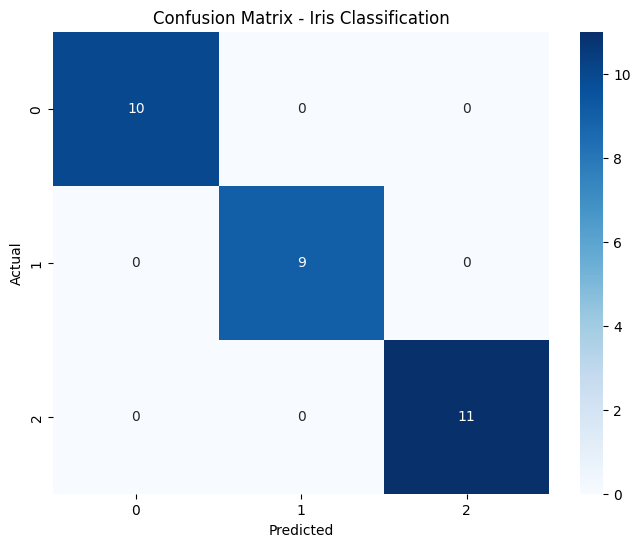

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Iris Classification')
plt.show()


In [102]:
import joblib

# Save model
joblib.dump(pipe, "iris_model.pkl")

# Load later
model_loaded = joblib.load("iris_model.pkl")
print("Loaded model accuracy:", model_loaded.score(X_test, y_test))


Loaded model accuracy: 1.0
